Packages Imported



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Input Sequence Here

In [2]:
sequence_1 = 'CGCTCGCT'
sequence_2 = 'CACTCGT'

Comparing Strings

In [3]:
def compare(s1,s2):
  l1 = len(s1)
  l2 = len(s2)
  
  if l1 < l2:
    temp = s1
    s1 = s2
    s2 = temp
    l1 = len(s1)
    l2 = len(s2)
  return s1,s2,l1,l2

In [4]:
def score(m,s1,s2,i,j):
  
  s1,s2,l1,l2 = compare(s1,s2)
  
  u_score = m[i-1][j] - 2
  s_score = m[i][j-1] - 2

  d_score = 0

  if s1[j-1] == s2[i-1]:
    d_score += m[i-1][j-1] + 1
  else:
    d_score += m[i-1][j-1] - 1
    
  return max([u_score,s_score,d_score])

In [5]:
def Needleman_Wunsch_method(s1,s2):

  s1,s2,l1,l2 = compare(s1,s2)
  m = l2 + 1
  n = l1 + 1

  matrix = np.zeros((m,n),dtype="int")
  
  for i in range(1,n):
    matrix[0,i] += matrix[0,i-1] -2
  
  for i in range(1,m):
    matrix[i,0] += matrix[i-1,0] -2
  
  for i in range(1,m):
    for j in range(1,n):
      matrix[i,j] = score(matrix,s1,s2,i,j)
  
  final = pd.DataFrame(matrix)

  for i in range(1,n):
    final.rename(columns= {final.columns[i] : s1[i-1]},inplace=True)

  for i in range(1,m):
    final.rename(index= {final.index[i] : s2[i-1]},inplace=True)

  print(f"{final}")
  return matrix

In [6]:
matrix = Needleman_Wunsch_method(sequence_1,sequence_2)

    0   C  G  C  T   C   G   C   T
0   0  -2 -4 -6 -8 -10 -12 -14 -16
C  -2   1 -1 -3 -5  -7  -9 -11 -13
A  -4  -1  0 -2 -4  -6  -8 -10 -12
C  -6  -3 -2  1 -1  -3  -5  -7  -9
T  -8  -5 -4 -1  2   0  -2  -4  -6
C -10  -7 -6 -3  0   3   1  -1  -3
G -12  -9 -6 -5 -2   1   4   2   0
T -14 -11 -8 -7 -4  -1   2   3   3


In [7]:
def traceback_score(matrix,s1,s2,i,j):
  s1,s2,l1,l2 = compare(s1,s2)

  a = 0
  b = 0

  sequence = ''
  
  u_score = matrix[i-1][j]
  s_score = matrix[i][j-1]

  max_score = max(u_score,s_score)

  if s1[j-1] == s2[i-1]:
    a = i - 1
    b = j - 1
    sequence = s1[j-1]
  else:
    if max_score == u_score:
      a = i - 1
      b = j
      sequence = '-'
    elif max_score == s_score:
      a = i
      b = j - 1
      sequence = '-'

  return (a,b),sequence


In [8]:
def Traceback(matrix,s1,s2):
  s1,s2,l1,l2 = compare(s1,s2)
  m = l2
  n = l1
  trace = [(m,n)]
  sequence = ''

  i = m
  j = n
  while i > 0 and j > 0:
    pos,s = traceback_score(matrix,s1,s2,i,j)
    trace.append(pos)
    sequence += s
    i = pos[0]
    j = pos[1]

  s1 = '0' + s1
  s2 = '0' + s2

  print(f"Sequence : {sequence[::-1]}")
  x = []
  y = []

  for i in range(len(trace)):
    x.append(trace[i][0])
    y.append(trace[i][1])
  
  plt.scatter(y,x,c='r')
  plt.plot(y,x)
  plt.tick_params(bottom = False,top = True,labelbottom=False,labeltop=True)
  plt.xticks(np.arange(len(list(s1))),list(s1))
  plt.yticks(np.arange(len(list(s2))),list(s2))
  plt.ylim(len(s2),-1,-1)
  plt.grid(True)
  plt.show()

Sequence : C--CTCG-T


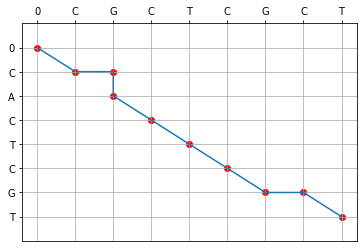

In [9]:
Traceback(matrix,sequence_1,sequence_2)